
tf.Tensor(
[[-0.4860738  -0.4860738 ]
 [-0.8601294  -0.8601294 ]
 [-1.0067396  -1.0067396 ]
 [-0.07740951 -0.07740951]
 [ 1.2192113   1.2192113 ]
 [ 0.7328008   0.7328008 ]
 [ 0.96144867  0.96144867]
 [ 1.7829022   1.7829022 ]], shape=(8, 2), dtype=float32)
Original: W = 
 [[-1.649019 ]
 [ 1.6503856]]
tf.Tensor([[0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[-1.7709402]
 [ 1.5284644]], shape=(2, 1), dtype=float32)
tf.Tensor([[-0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[-1.8442203]
 [ 1.4551843]], shape=(2, 1), dtype=float32)
tf.Tensor([[-0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[-1.9403652]
 [ 1.3590394]], shape=(2, 1), dtype=float32)
tf.Tensor([[-0.8807971]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[-2.1186554]
 [ 1.1807492]], shape=(2,

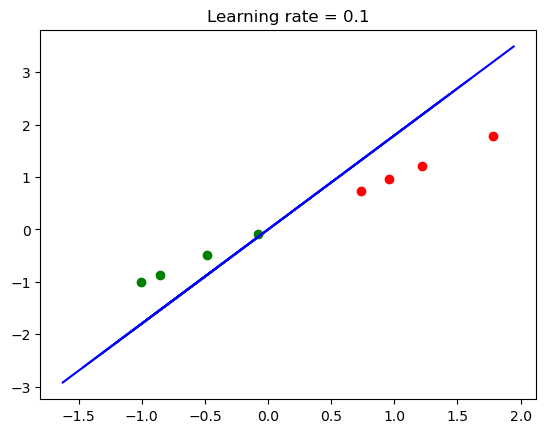

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def perceptron(X, T, W=None, lr=0.1): # lr = learning rate
    for i in range(8):
        b = 0.0
        Wt = tf.ones(shape=[1,2], dtype=tf.float32)
        Xreshape = tf.ones(shape=[2,1], dtype=tf.float32)
        A = T[i]*tf.nn.sigmoid(tf.matmul(Wt, Xreshape)+b)
        print(A)
        if (A <= 0):
            XReshape = tf.reshape(lr*T[i]*X[i,:], shape=[2, 1])
            W = tf.add(W, XReshape)
            print(W)
    return W

def plot_hyperplane2d(X, T, w):
    plt.title('Learning rate = 0.1')
    for i in range(8):
        if (T[i] == 1):
            plt.plot(X[i, 0], X[i, 1],'og')
        else:
            plt.plot(X[i, 0], X[i, 1],'or')
        if (w[1] != 0):
            xlim = plt.gca().get_xlim()
            slope = -w[0] / w[1]
            bias = 0.0
            plt.plot(xlim, [xlim[0] * slope + bias, xlim[1] * slope + bias], 'b')
        else:
            ylim = plt.gca().get_ylim()
            plt.plot([0, 0], ylim, 'b')
        
# Create random numbers with different seed
GuassRandom1 = tf.random.Generator.from_seed(5)
GuassRandom2 = tf.random.Generator.from_seed(1)

# Generate input vector : X1 with center@[-1,-1] and X2 with center@[1, 1]
X1 = tf.Variable(GuassRandom1.normal(shape=[4, 1], mean=0.0, stddev=0.5))+ tf.constant([-1.0, -1.0])
X2 = tf.Variable(GuassRandom2.normal(shape=[4, 1], mean=0.0, stddev=0.5)) + tf.constant([1.0, 1.0])
X = tf.concat(values=[X1, X2], axis=0)
print(X)
# Generate label vector for output data
T1 = tf.ones(shape=[4,1], dtype=tf.float32)
T2 = -1.0*tf.ones(shape=[4,1], dtype=tf.float32)
T = tf.concat(values=[T1, T2], axis=0)
# Initialize random weight vector : W
W = tf.Variable(GuassRandom1.normal(shape=[2, 1]))
print("Original: W = \n",W.numpy())
# Perform Learning process using the Perceptron
W = perceptron(X, T, W)
print("After Learning: W = \n",W.numpy())
# Plot hyperplane to examine how accurate perceptron perform learning proess
plot_hyperplane2d(X, T, W)
plt.show()